In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('state_wise_daily.csv')
df

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,05-Aug-21,2021-08-05,Recovered,40906,0,2003,349,1249,45,4,...,45,20,215,1943,638,248,50,67,823,0
1529,05-Aug-21,2021-08-05,Deceased,465,0,24,0,17,0,0,...,2,0,2,33,3,4,3,0,13,0
1530,06-Aug-21,2021-08-06,Confirmed,38705,0,2209,227,975,55,4,...,61,20,126,1985,577,245,40,29,717,0
1531,06-Aug-21,2021-08-06,Recovered,40026,0,1896,420,1266,63,5,...,41,18,245,1908,645,432,79,48,787,0


In [3]:
# confirmed

In [4]:
df_confirmed = df[df['Status'] == 'Confirmed']
df_confirmed.reset_index(drop=True, inplace=True)

In [5]:
date_time = pd.to_datetime(df_confirmed.pop('Date_YMD'), format='%Y-%m-%d')
date_time

0     2020-03-14
1     2020-03-15
2     2020-03-16
3     2020-03-17
4     2020-03-18
         ...    
506   2021-08-02
507   2021-08-03
508   2021-08-04
509   2021-08-05
510   2021-08-06
Name: Date_YMD, Length: 511, dtype: datetime64[ns]

array([<AxesSubplot:xlabel='Date_YMD'>, <AxesSubplot:xlabel='Date_YMD'>,
       <AxesSubplot:xlabel='Date_YMD'>], dtype=object)

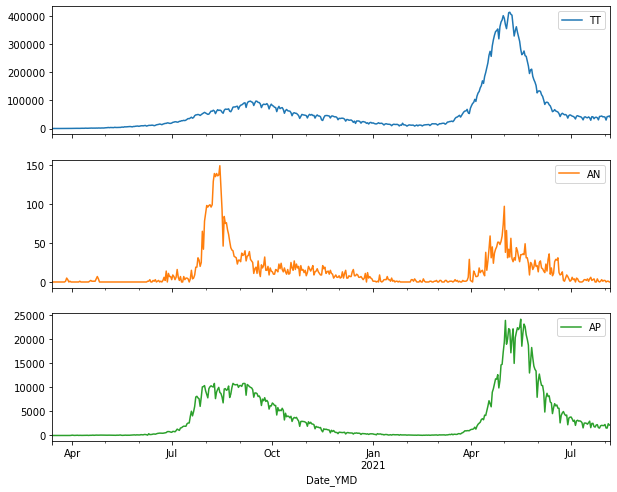

In [6]:
df_confirmed = df_confirmed[['TT', 'AN', 'AP']]
df_confirmed.index = date_time
df_confirmed.plot(subplots=True, figsize=(10,8))

In [7]:
# time

In [8]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

0      1.584144e+09
1      1.584230e+09
2      1.584317e+09
3      1.584403e+09
4      1.584490e+09
           ...     
506    1.627862e+09
507    1.627949e+09
508    1.628035e+09
509    1.628122e+09
510    1.628208e+09
Name: Date_YMD, Length: 511, dtype: float64

In [9]:
day = 24*60*60
year = (365.2425)*day

df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

NameError: name 'day' is not defined

In [ ]:
plt.plot(np.array(df['Year sin'])[:365])
plt.plot(np.array(df['Year cos'])[:365])
plt.xlabel('Time [h]')
plt.title('Time of day signal')